<a href="https://colab.research.google.com/github/KiranGangoor0301/HeartDisease_Prediction_Logistic_Regression/blob/main/Logistic_Regression_Heart_rate_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')


# Print the number of records with and without heart disease.
print("Number of records in each label are")
print(df['target'].value_counts())

# Print the percentage of each label
print("\nPercentage of records in each label are")
print(df['target'].value_counts() * 100 / df.shape[0], "\n")

# Print the first five rows of Dataframe.
df.head()

Number of records in each label are
1    165
0    138
Name: target, dtype: int64

Percentage of records in each label are
1    54.455446
0    45.544554
Name: target, dtype: float64 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Sigmoid Function

The sigmoid function, in maths, classifies any data point between **0** and **1**. The graph of a sigmoid function follows the shape of English letter **S**. Mathematically, the sigmoid function is given as

$$y =  \frac{1}{1 + e^{-x}}$$

where,  

- $y$ is the output of the sigmoid function

- $x$ is an independent variable

- $e$ is Euler's constant

The $x$ takes all the values between $- \infty$ to $\infty$ i.e., $x \in (-\infty, \infty)$ and the $y$ ranges between $0$ to $1$ i.e., $y \in (0, 1)$.

In [ ]:
def sigmoid(x):
    return pd.Series(1 / ( 1 + np.exp(-x)))

In [ ]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

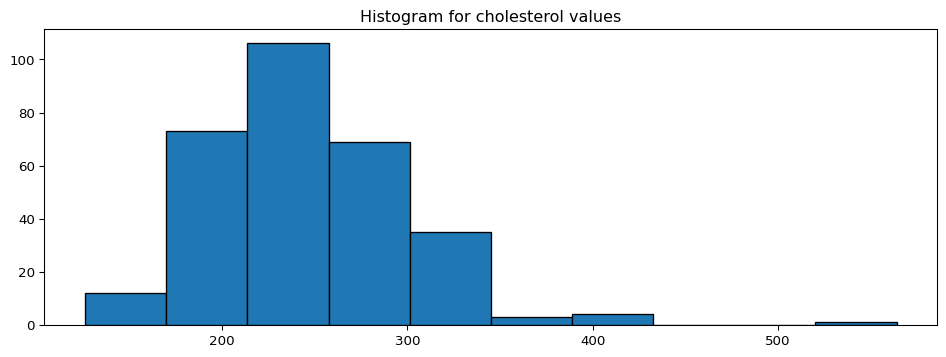

In [ ]:
plt.figure(figsize = (12,4), dpi = 96)
plt.title("Histogram for cholesterol values")
plt.hist(df['chol'], bins = 'sturges', edgecolor = 'black')
plt. show()

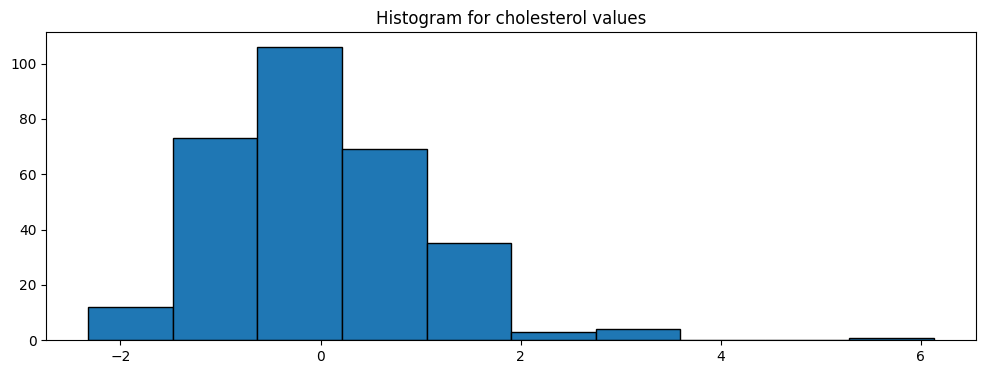

In [ ]:
def standard_scalar(series):
    new_series = (series - series.mean()) / series.std()
    return new_series
scaled_chol = standard_scalar(df['chol'])

plt.figure(figsize = (12,4))
plt.title("Histogram for cholesterol values")
plt.hist(scaled_chol, bins = 'sturges', edgecolor = 'black')
plt.show()

In [ ]:
chol_sig_output = sigmoid(df['chol'])
chol_sig_output.describe()

count    303.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: chol, dtype: float64

In [ ]:
scaled_chol_sig_output = sigmoid(scaled_chol)
scaled_chol_sig_output.describe()

count    303.000000
mean       0.492837
std        0.198175
min        0.089454
25%        0.336179
50%        0.469823
75%        0.632919
max        0.997829
Name: chol, dtype: float64

In [ ]:
def predict(sig_output, threshold):
    y_pred = [ 1 if output >= threshold else 0 for output in sig_output]
    return pd.Series(y_pred)

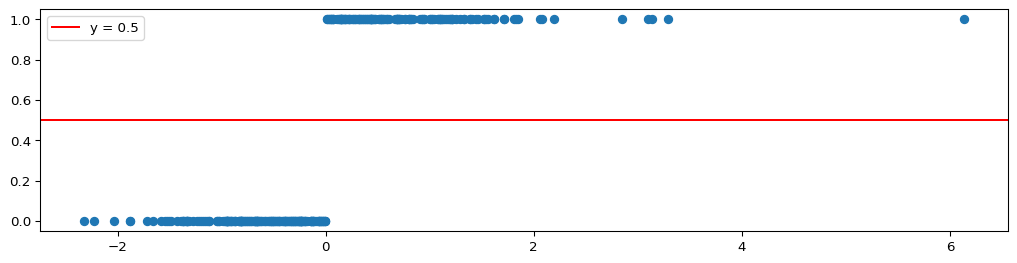

In [ ]:
threshold = 0.5
heart_disease_pred = predict(scaled_chol_sig_output, threshold)

plt.figure(figsize=(13,3), dpi = 96)
plt.scatter(scaled_chol, heart_disease_pred)
plt.axhline(y = threshold, label = f'y = { threshold }', color = 'r')
plt. legend()
plt.show()

In [ ]:
print(f"Threshold value: {threshold}")
print(f"\nPredicted value counts:\n{heart_disease_pred.value_counts()}")
print(f"\nActual value counts:\n{df['target']. value_counts()}")


Threshold value: 0.5

Predicted value counts:
0    167
1    136
dtype: int64

Actual value counts:
1    165
0    138
Name: target, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['target'], heart_disease_pred))

[[ 65  73]
 [102  63]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['target'], heart_disease_pred))

              precision    recall  f1-score   support

           0       0.39      0.47      0.43       138
           1       0.46      0.38      0.42       165

    accuracy                           0.42       303
   macro avg       0.43      0.43      0.42       303
weighted avg       0.43      0.42      0.42       303



In [ ]:
#Split the training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [ ]:
#Create a multivariate logistic regression model. Also, predict the target values for the train set.
from sklearn.linear_model import LogisticRegression

log_clf_1 = LogisticRegression()
log_clf_1.fit(X_train, y_train)
print(log_clf_1.score(X_train, y_train))

#Predict the target values for the train set.
y_train_pred = log_clf_1.predict(X_train)

print("\n Confusion Matrix \n")
print(confusion_matrix(y_train, y_train_pred))

print("\n Classification Report\n")
print(classification_report(y_train, y_train_pred))

0.8632075471698113

 Confusion Matrix 

[[ 77  20]
 [  9 106]]

 Classification Report

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.84      0.92      0.88       115

    accuracy                           0.86       212
   macro avg       0.87      0.86      0.86       212
weighted avg       0.87      0.86      0.86       212



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the target values for the test set.

y_test_pred = log_clf_1.predict(X_test)

print(f"{'Test Set'.upper()}\n{'-' * 75}\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report")
print(classification_report(y_test, y_test_pred))

TEST SET
---------------------------------------------------------------------------
Confusion Matrix:
[[32  9]
 [ 8 42]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Data Standardisation^^

As you must have observed, when the logistic regression is applied we got the following warning message shown below quite a few times:
```
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
```

The message is displayed because the **Limited-memory Broyden–Fletcher–Goldfarb–Shanno** (or L-BFGS) algorithm used by the `LogisticRegression` class of the `sklearn.linear_model` module to calculate the optimum value of coefficients (betas) for a regularised cost function ran out of memory to store the results of iterations. The L-BFGS algorithm, unlike gradient descent algorithm, is a second-order (uses second derivatives i.e. $\frac{\partial^2 J}{\partial \beta^2}$ instead of first-order derivatives i.e. $\frac{\partial J}{\partial \beta}$ ) optimiser stores data of the last few iterations only to save memory.

Another reason for the popping-up of the warning message is poorly scaled data. Here are a couple of ways to avoid `ConvergenceWarning` message:

1. Increase the number of iterations i.e. set the value of `max_iter` parameter to 100 i.e. `max_iter = 100` in the `LogisticRegression` constructor.

2. Scale the data using one of the normalisation methods, say standard normalisation.

Therefore, let's create a function `standard_scalar()` to normalise the `X_train` and `X_test` data-frames using standard normalisation method i.e.

$$x_{\text{std}} = \frac{(x_i - \mu)}{\sigma} $$



In [ ]:
#Normalise the train and test data-frames using the standard normalisation method.
def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

norm_X_train = X_train.apply(standard_scaler, axis = 0)
norm_X_test = X_test.apply(standard_scaler, axis = 0)

norm_X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02
mean,1.864337e-16,1.298751e-16,2.251867e-17,5.697748e-16,1.424437e-16,-5.812960e-17,-1.005485e-16,3.058350e-16,9.216946e-17,7.541138e-17,5.865329e-17,7.960090e-17,3.770569e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.757098e+00,-1.391141e+00,-9.778484e-01,-2.142798e+00,-2.129975e+00,-3.811266e-01,-1.029172e+00,-2.731467e+00,-6.855616e-01,-9.289910e-01,-2.305793e+00,-6.746937e-01,-3.912465e+00
25%,-7.177485e-01,-1.391141e+00,-9.778484e-01,-6.152369e-01,-6.649586e-01,-3.811266e-01,-1.029172e+00,-6.547229e-01,-6.855616e-01,-9.289910e-01,-6.763660e-01,-6.746937e-01,-5.475864e-01
50%,7.080006e-02,7.154438e-01,-1.364440e-02,-2.771338e-02,-1.338901e-01,-3.811266e-01,8.680843e-01,1.693821e-01,-6.855616e-01,-1.961683e-01,-6.763660e-01,-6.746937e-01,-5.475864e-01
75%,7.233920e-01,7.154438e-01,9.505596e-01,5.598102e-01,5.162111e-01,-3.811266e-01,8.680843e-01,7.847138e-01,1.451778e+00,5.366543e-01,9.530612e-01,3.770347e-01,1.134853e+00
max,2.463637e+00,7.154438e-01,1.914764e+00,3.614933e+00,5.799427e+00,2.611423e+00,2.765341e+00,2.279091e+00,1.451778e+00,4.200768e+00,9.530612e-01,3.532220e+00,1.134853e+00


In [ ]:
#Display descriptive statistics for the normalised values of the features for the test data-frames.
norm_X_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,-2.147245e-16,-1.390829e-16,-1.952040e-17,-6.868742e-16,-4.148086e-17,3.538073e-17,-4.880101e-18,-5.294910e-16,-1.049222e-16,1.339037e-16,-1.244426e-16,-6.344132e-17,1.848338e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.301763e+00,-1.661622e+00,-8.425578e-01,-1.853721e+00,-2.624853e+00,-4.938276e-01,-9.430373e-01,-3.319275e+00,-7.148350e-01,-8.367971e-01,-2.184053e+00,-8.102615e-01,-3.491486e+00
25%,-8.354271e-01,-1.661622e+00,-8.425578e-01,-6.650121e-01,-7.201088e-01,-4.938276e-01,-9.430373e-01,-6.418709e-01,-7.148350e-01,-8.367971e-01,-5.812398e-01,-8.102615e-01,-4.364358e-01
50%,1.797284e-01,5.952080e-01,-8.425578e-01,-1.662530e-02,-1.836075e-02,-4.938276e-01,-9.430373e-01,1.078023e-01,-7.148350e-01,-3.799059e-01,-5.812398e-01,-8.102615e-01,-4.364358e-01
75%,6.309086e-01,5.952080e-01,1.123410e+00,4.696648e-01,6.165541e-01,-4.938276e-01,9.639937e-01,6.432832e-01,1.383552e+00,5.719508e-01,1.021573e+00,9.246514e-01,1.091089e+00
max,2.435630e+00,5.952080e-01,2.106394e+00,3.549502e+00,3.679740e+00,2.002745e+00,2.871025e+00,1.864180e+00,1.383552e+00,3.884412e+00,1.021573e+00,2.659564e+00,1.091089e+00


In [ ]:
#Create a dictionary containing the different combination of features selected by RFE and their corresponding f1-scores.
# Import the libraries
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# Create the empty dictionary.
dict_rfe = {}

# Create a loop
for i in range(1, len(X_train.columns) + 1):
  lg_clf_2 = LogisticRegression()
  rfe = RFE(lg_clf_2,n_features_to_select=i) # 'i' is the number of features to be selected by RFE to fit a logistic regression model on norm_X_train and y_train.
  rfe.fit(norm_X_train, y_train)

  rfe_features = list(norm_X_train.columns[rfe.support_]) # A list of important features chosen by RFE.
  rfe_X_train = norm_X_train[rfe_features]

  # Build a logistic regression model using the features selected by RFE.
  lg_clf_3 = LogisticRegression()
  lg_clf_3.fit(rfe_X_train, y_train)

  # Predicting 'y' values only for the test set as generally, they are predicted quite accurately for the train set.
  y_test_pred = lg_clf_3.predict(norm_X_test[rfe_features])

  f1_scores_array = f1_score(y_test, y_test_pred, average = None)
  dict_rfe[i] = {"features": list(rfe_features), "f1_score": f1_scores_array} # 'i' is the number of features to be selected by RFE.

In [ ]:
#Print the dictionary created
dict_rfe

{1: {'features': ['oldpeak'], 'f1_score': array([0.65789474, 0.75471698])},
 2: {'features': ['cp', 'oldpeak'],
  'f1_score': array([0.78378378, 0.85185185])},
 3: {'features': ['cp', 'oldpeak', 'ca'],
  'f1_score': array([0.8       , 0.84313725])},
 4: {'features': ['cp', 'oldpeak', 'ca', 'thal'],
  'f1_score': array([0.76923077, 0.82692308])},
 5: {'features': ['cp', 'exang', 'oldpeak', 'ca', 'thal'],
  'f1_score': array([0.79487179, 0.84615385])},
 6: {'features': ['cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
  'f1_score': array([0.8       , 0.84313725])},
 7: {'features': ['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
  'f1_score': array([0.78481013, 0.83495146])},
 8: {'features': ['sex',
   'cp',
   'restecg',
   'exang',
   'oldpeak',
   'slope',
   'ca',
   'thal'],
  'f1_score': array([0.79487179, 0.84615385])},
 9: {'features': ['sex',
   'cp',
   'restecg',
   'thalach',
   'exang',
   'oldpeak',
   'slope',
   'ca',
   'thal'],
  'f1_score': array([0.8205128

In [ ]:
#Convert the dictionary to the dataframe
pd.options.display.max_colwidth = 100
f1_df = pd.DataFrame.from_dict(dict_rfe, orient = 'index')
f1_df

,features,f1_score
1,[oldpeak],"[0.6578947368421052, 0.7547169811320756]"
2,"[cp, oldpeak]","[0.7837837837837839, 0.851851851851852]"
3,"[cp, oldpeak, ca]","[0.8, 0.8431372549019608]"
4,"[cp, oldpeak, ca, thal]","[0.7692307692307694, 0.826923076923077]"
5,"[cp, exang, oldpeak, ca, thal]","[0.7948717948717948, 0.8461538461538461]"
6,"[cp, exang, oldpeak, slope, ca, thal]","[0.8, 0.8431372549019608]"
7,"[sex, cp, exang, oldpeak, slope, ca, thal]","[0.7848101265822786, 0.8349514563106797]"
8,"[sex, cp, restecg, exang, oldpeak, slope, ca, thal]","[0.7948717948717948, 0.8461538461538461]"
9,"[sex, cp, restecg, thalach, exang, oldpeak, slope, ca, thal]","[0.8205128205128206, 0.8653846153846153]"
10,"[sex, cp, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]","[0.8205128205128206, 0.8653846153846153]"


In [ ]:
#Logistic Regression with the ideal number of features.
lg_clf_4 = LogisticRegression()
rfe = RFE(lg_clf_4, n_features_to_select = 3)

rfe.fit(norm_X_train, y_train)

rfe_features = norm_X_train.columns[rfe.support_]
print(rfe_features)
final_X_train = norm_X_train[rfe_features]

lg_clf_4 = LogisticRegression()
lg_clf_4.fit(final_X_train, y_train)

y_test_predict = lg_clf_4.predict(norm_X_test[rfe_features])
final_f1_scores_array = f1_score(y_test, y_test_predict, average = None)
print(final_f1_scores_array)

Index(['cp', 'oldpeak', 'ca'], dtype='object')
[0.8        0.84313725]
